<h1>REGIONE UMBRIA</h1>

Confronto dei dati relativi ai decessi registrati dall'ISTAT e i decessi causa COVID-19 registrati dalla Protezione Civile Italiana con i decessi previsti dal modello predittivo SARIMA.

<h2>DECESSI MENSILI REGIONE ABRUZZO ISTAT</h2>

Il DataFrame contiene i dati relativi ai decessi mensili della regione <b>Umbria</b> dal <b>2015</b> al <b>30 gigno 2020</b>.

In [1]:
import matplotlib.pyplot as plt

import pandas as pd
decessi_istat = pd.read_csv('../../csv/regioni/umbria.csv')
decessi_istat.head()

,DATA,TOTALE
0,2015-01-31,1102
1,2015-02-28,978
2,2015-03-31,986
3,2015-04-30,890
4,2015-05-31,823


In [2]:
decessi_istat['DATA'] = pd.to_datetime(decessi_istat['DATA'])
decessi_istat.TOTALE = pd.to_numeric(decessi_istat.TOTALE)


<h3>Recupero dei dati inerenti al periodo COVID-19</h3>

In [3]:
decessi_istat = decessi_istat[decessi_istat['DATA'] > '2020-02-29']
decessi_istat.head()


,DATA,TOTALE
62,2020-03-31,1004
63,2020-04-30,814
64,2020-05-31,748
65,2020-06-30,717


<h3>Creazione serie storica dei decessi ISTAT</h3>

In [4]:
decessi_istat = decessi_istat.set_index('DATA')
decessi_istat = decessi_istat.TOTALE
decessi_istat

DATA
2020-03-31    1004
2020-04-30     814
2020-05-31     748
2020-06-30     717
Name: TOTALE, dtype: int64

<h2>DECESSI MENSILI REGIONE ABRUZZO CAUSATI DAL COVID</h2>

Il DataFrame contine i dati forniti dalla Protezione Civile relativi ai decessi mensili della regione <b>Umbria</b> da <b> marzo 2020</b> al <b>30 giugno 2020</b>.

In [6]:
covid = pd.read_csv('../../csv/regioni_pesate/umbria.csv')
covid.head()

,data,deceduti
0,2020-03-31,35.002
1,2020-04-30,28.380
2,2020-05-31,8.514
3,2020-06-30,3.784


In [7]:
covid['data'] = pd.to_datetime(covid['data'])
covid.deceduti = pd.to_numeric(covid.deceduti)

In [8]:
covid = covid.set_index('data')
covid.head()

,deceduti
data,
2020-03-31,35.002
2020-04-30,28.380
2020-05-31,8.514
2020-06-30,3.784


<h3>Creazione serie storica dei decessi COVID-19</h3>

In [9]:
covid = covid.deceduti

<h2>PREDIZIONE DECESSI MENSILI REGIONE SECONDO MODELLO SARIMA</h2>

Il DataFrame contiene i dati riguardanti i decessi mensili della regione <b>Umbria</b> secondo la predizione del modello SARIMA applicato. 

In [10]:
predictions = pd.read_csv('../../csv/pred/predictions_SARIMA_umbria.csv')
predictions.head()

,Unnamed: 0,predicted_mean
0,2015-01-31,0.000000
1,2015-02-28,1100.219755
2,2015-03-31,1069.409117
3,2015-04-30,972.100652
4,2015-05-31,978.336950


In [11]:
predictions.rename(columns={'Unnamed: 0': 'Data', 'predicted_mean':'Totale'}, inplace=True)
predictions.head()

,Data,Totale
0,2015-01-31,0.000000
1,2015-02-28,1100.219755
2,2015-03-31,1069.409117
3,2015-04-30,972.100652
4,2015-05-31,978.336950


In [12]:
predictions['Data'] = pd.to_datetime(predictions['Data'])
predictions.Totale = pd.to_numeric(predictions.Totale)

<h3>Recupero dei dati inerenti al periodo COVID-19</h3>

In [13]:
predictions = predictions[predictions['Data'] > '2020-02-29']
predictions.head()

,Data,Totale
62,2020-03-31,874.187805
63,2020-04-30,807.004995
64,2020-05-31,730.073150
65,2020-06-30,784.161090


In [14]:
predictions = predictions.set_index('Data')
predictions.head()

,Totale
Data,
2020-03-31,874.187805
2020-04-30,807.004995
2020-05-31,730.073150
2020-06-30,784.161090


<h3>Creazione serie storica dei decessi secondo la predizione del modello</h3>

In [15]:
predictions = predictions.Totale

<h1> CONFRONTO DELLE SERIE STORICHE </h1>

Di seguito il confronto grafico tra le serie storiche dei <b>decessi totali mensili</b>, dei <b>decessi causa COVID-19</b> e dei <b>decessi previsti dal modello SARIMA</b> della regione <b>Umbria</b>.
<br />
I mesi di riferimento sono: <b>marzo</b>, <b>aprile</b>, <b>maggio</b> e <b>giugno</b>.

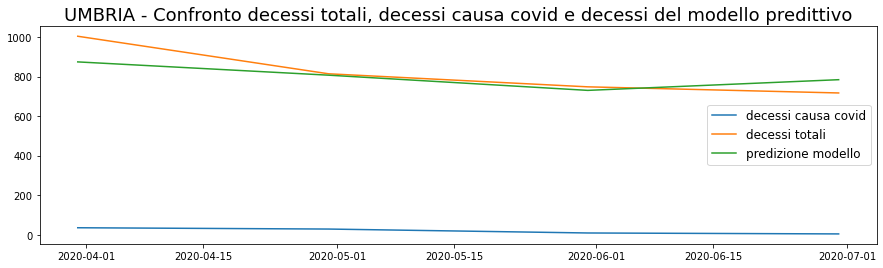

In [16]:
plt.figure(figsize=(15,4))
plt.title('UMBRIA - Confronto decessi totali, decessi causa covid e decessi del modello predittivo', size=18)
plt.plot(covid, label='decessi causa covid')
plt.plot(decessi_istat, label='decessi totali')
plt.plot(predictions, label='predizione modello')
plt.legend(prop={'size': 12})
plt.show()

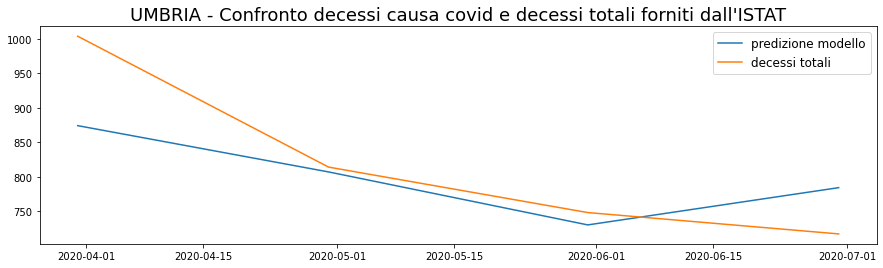

In [17]:
plt.figure(figsize=(15,4))
plt.title("UMBRIA - Confronto decessi causa covid e decessi totali forniti dall'ISTAT", size=18)
plt.plot(predictions, label='predizione modello')
plt.plot(decessi_istat, label='decessi totali')
plt.legend(prop={'size': 12})
plt.show()

<h3>Calcolo dei decessi COVID-19 secondo il modello predittivo</h3>

Differenza tra i decessi totali rilasciati dall'ISTAT e i decessi secondo la previsione del modello SARIMA.

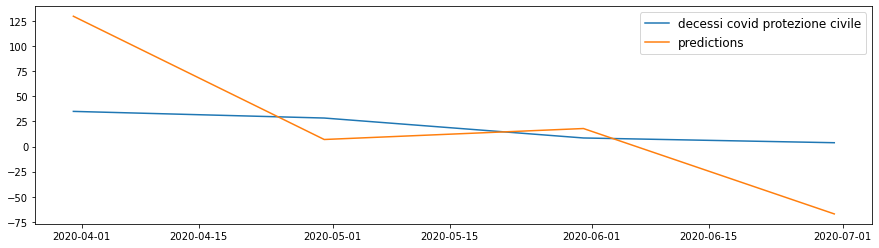

In [18]:
n = decessi_istat - predictions

plt.figure(figsize=(15,4))
plt.plot(covid, label='decessi covid protezione civile')
plt.plot(n, label='predictions')
plt.legend(prop={'size': 12})
plt.show()

<h3>Numero totale dei decessi COVID-19 previsti dal modello per la regione Umbria</h3>

In [19]:
total = n.sum()
print(int(total))

87


<h3>Numero totale dei decessi COVID-19 per la regione Umbria</h3>

In [20]:
m = covid.sum()
print(int(m))

75


<h3>Calcolo del numero dei decessi COVID-19 non registrati secondo il modello predittivo SARIMA della regione Umbria</h3>

In [21]:
# numero di decessi non registrati
x = decessi_istat - predictions - covid
x = x.sum()
print(int(x))

11
